# Import Libraries

In [ ]:
!pip install tensorflow

In [ ]:
import time

In [ ]:
# File reading
import os
from google.colab import drive
from typing import List

In [ ]:
# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Image Preprocessing
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage.morphology import skeletonize, thin
from skimage import data
from skimage.util import invert

In [128]:
# Tensorflow
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Pseudocode

```
procedure FeedforwardNeuralNetwork(X_train, y_train, num_epochs, learning_rate)
    // Initialize parameters
    initialize W1 = random values (N x H) // Weights from input to hidden layer
    initialize b1 = zeros (H) // Biases for hidden layer
    initialize W2 = random values (H x K) // Weights from hidden to output layer
    initialize b2 = zeros (K) // Biases for output layer

    for epoch from 1 to num_epochs do
        total_loss = 0
        
        for each x_train, y_train in X_train, Y_train do
            // Forward Pass
            z1 = W1 * x_train + b1 // Linear transformation to hidden layer
            a1 = ReLU(z1) // Activation function for hidden layer
            
            z2 = W2 * a1 + b2 // Linear transformation to output layer
            y_hat = softmax(z2) // Softmax activation for output probabilities
            
            // Compute Loss (Cross-Entropy)
            loss = -sum(y_train * log(y_hat)) // Cross-entropy loss
            total_loss += loss
            
            // Backward Pass
            dL_dz2 = y_hat - y_train // Gradient of loss w.r.t. z2
            dL_dW2 = dL_dz2 * a1^T // Gradient of loss w.r.t. W2
            dL_db2 = dL_dz2 // Gradient of loss w.r.t. b2
            
            dL_da1 = W2^T * dL_dz2 // Gradient of loss w.r.t. a1
            dL_dz1 = dL_da1 * ReLU'(z1) // Derivative of ReLU
            
            dL_dW1 = dL_dz1 * x_train^T // Gradient of loss w.r.t. W1
            dL_db1 = dL_dz1 // Gradient of loss w.r.t. b1
            
            // Update Weights and Biases
            W1 -= learning_rate * dL_dW1
            b1 -= learning_rate * dL_db1
            W2 -= learning_rate * dL_dW2
            b2 -= learning_rate * dL_db2
            
        end for
        
        average_loss = total_loss / m // Average loss over the batch
        print("Epoch:", epoch, "Loss:", average_loss)

end procedure

// Softmax Function Definition
function softmax(z)
    exp_z = exp(z - max(z)) // For numerical stability
    return exp_z / sum(exp_z)
end function

// ReLU Function Definition
function ReLU(x)
    return max(0, x) // Element-wise operation
end function

// Derivative of ReLU Function Definition
function ReLU'(x)
    return 1 if x > 0 else 0 // Element-wise operation
end function
```

# Load Dataset

In [179]:
df_train010 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_010.csv")
df_train028 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_028.csv")
df_train064 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_064.csv")
df_train110 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_110.csv")
df_train128 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_128.csv")
df_train164 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_164.csv")

In [180]:
df_test010 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_010.csv")
df_test028 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_028.csv")
df_test064 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_064.csv")
df_test110 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_110.csv")
df_test128 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_128.csv")
df_test164 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_164.csv")

In [206]:
X_train010 = df_train010.drop('label', axis=1).values
X_train028 = df_train028.drop('label', axis=1).values
X_train064 = df_train064.drop('label', axis=1).values
X_train110 = df_train110.drop('label', axis=1).values
X_train128 = df_train128.drop('label', axis=1).values
X_train164 = df_train164.drop('label', axis=1).values

In [207]:
y_train010 = df_train010['label'].values
y_train028 = df_train028['label'].values
y_train064 = df_train064['label'].values
y_train110 = df_train110['label'].values
y_train128 = df_train128['label'].values
y_train164 = df_train164['label'].values

In [208]:
X_test010 = df_test010.drop('label', axis=1).values
X_test028 = df_test028.drop('label', axis=1).values
X_test064 = df_test064.drop('label', axis=1).values
X_test110 = df_test110.drop(['Unnamed: 0', 'label'], axis=1).values
X_test128 = df_test128.drop(['Unnamed: 0', 'label'], axis=1).values
X_test164 = df_test164.drop(['Unnamed: 0', 'label'], axis=1).values

In [209]:
y_test010 = df_test010['label'].values
y_test028 = df_test028['label'].values
y_test064 = df_test064['label'].values
y_test110 = df_test110['label'].values
y_test128 = df_test128['label'].values
y_test164 = df_test164['label'].values

# Manual Code

In [198]:
class MLP:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate=0.01):
        # Initialize weights using initialization for ReLU
        self.W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2.0/input_size)
        self.b1 = np.zeros((1, hidden_size1))
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2.0/hidden_size1)
        self.b2 = np.zeros((1, hidden_size2))
        self.W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2.0/hidden_size2)
        self.b3 = np.zeros((1, output_size))

        self.learning_rate = learning_rate

    def forward(self, X):
        # Forward pass
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)

        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.relu(self.Z2)

        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.softmax(self.Z3)

        return self.A3

    def relu(self, Z):
        return np.maximum(0, Z)

    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return expZ / expZ.sum(axis=1, keepdims=True)

    def compute_loss(self, Y_pred, Y_true):
        m = Y_true.shape[0]
        epsilon = 1e-15
        Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)
        log_likelihood = -np.log(Y_pred[range(m), Y_true])
        return np.sum(log_likelihood) / m

    def backward(self, X, Y_true):
        m = Y_true.shape[0]

        # One-hot encoding of Y_true
        Y_one_hot = np.zeros_like(self.A3)
        Y_one_hot[range(m), Y_true] = 1

        # Calculate gradients using backpropagation
        dZ3 = self.A3 - Y_one_hot
        dW3 = np.dot(self.A2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m

        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * (self.Z2 > 0)  # ReLU derivative

        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * (self.Z1 > 0)  # ReLU derivative

        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases using gradient descent
        self.W3 -= self.learning_rate * dW3
        self.b3 -= self.learning_rate * db3
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def train(self, X_train, Y_train, X_val=None, Y_val=None, batch_size=128, epochs=1000):
        training_history = {'loss': [], 'accuracy': [], 'val_accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

        n_samples = X_train.shape[0]

        for epoch in range(epochs):
            indices = np.random.permutation(n_samples)
            epoch_losses = []
            epoch_accuracies = []

            for i in range(0, n_samples, batch_size):
                batch_indices = indices[i:min(i + batch_size, n_samples)]
                X_batch = X_train[batch_indices]
                Y_batch = Y_train[batch_indices]

                # Forward pass
                Y_pred = self.forward(X_batch)

                # Compute batch loss and accuracy
                loss = self.compute_loss(Y_pred, Y_batch)
                accuracy = np.mean(np.argmax(Y_pred, axis=1) == Y_batch)

                # Backward pass
                self.backward(X_batch, Y_batch)

                epoch_losses.append(loss)
                epoch_accuracies.append(accuracy)

            avg_loss = np.mean(epoch_losses)
            avg_accuracy = np.mean(epoch_accuracies)

            training_history['loss'].append(avg_loss)
            training_history['accuracy'].append(avg_accuracy)

            # Validation metrics calculation if validation data is provided
            if X_val is not None and Y_val is not None:
                val_predictions = self.forward(X_val)
                val_accuracy = np.mean(np.argmax(val_predictions, axis=1) == Y_val)

                # Calculate precision, recall and F1 score for validation set
                val_preds_classified = np.argmax(val_predictions, axis=1)

                precision = precision_score(Y_val.argmax(axis=1), val_preds_classified,
                                            average='weighted')
                recall = recall_score(Y_val.argmax(axis=1), val_preds_classified,
                                      average='weighted')
                f1 = f1_score(Y_val.argmax(axis=1), val_preds_classified,
                               average='weighted')

                training_history['val_accuracy'].append(val_accuracy)
                training_history['precision'].append(precision)
                training_history['recall'].append(recall)
                training_history['f1_score'].append(f1)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.4f}')
                if X_val is not None and Y_val is not None:
                    print(f'Validation Accuracy: {val_accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

        return training_history

    def evaluate(self, X_test, y_test):
        predictions = self.forward(X_test)
        test_preds_classified = np.argmax(predictions, axis=1)

        accuracy = np.mean(np.argmax(predictions, axis=1) == y_test)

        loss = self.compute_loss(predictions,y_test)

        precision_test= precision_score(y_test, test_preds_classified , average='weighted')
        recall_test= recall_score(y_test, test_preds_classified , average='weighted')
        f1_test= f1_score(y_test, test_preds_classified , average='weighted')

        return {
             'accuracy': accuracy,
             'loss': loss,
             'precision': precision_test,
             'recall': recall_test,
             'f1_score': f1_test,
             'predictions': test_preds_classified
         }

In [199]:
def cross_validate(X, y, model_class, k=5, batch_size=128, epochs=1000):
    kf = KFold(n_splits=k, shuffle=True)
    fold_results = []

    for fold, (train_index, val_index) in enumerate(kf.split(X)):
        print(f'\nFold {fold + 1}/{k}')
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        # Initialize and train model
        model = model_class(input_size=X.shape[1], hidden_size1=64,
                          hidden_size2=32, output_size=len(np.unique(y)))

        # Train the model
        history = model.train(X_train_fold, y_train_fold,
                            batch_size=batch_size, epochs=epochs)

        # Evaluate on validation fold
        val_results = model.evaluate(X_val_fold, y_val_fold)
        fold_results.append(val_results)

        print(f'Validation Accuracy: {val_results["accuracy"]:.4f}')
        print(f'Validation Loss: {val_results["loss"]:.4f}')

    # Calculate average metrics across folds
    avg_accuracy = np.mean([result['accuracy'] for result in fold_results])
    avg_loss = np.mean([result['loss'] for result in fold_results])

    print(f'\nAverage Cross-Validation Results:')
    print(f'Accuracy: {avg_accuracy:.4f} ± {np.std([result["accuracy"] for result in fold_results]):.4f}')
    print(f'Loss: {avg_loss:.4f} ± {np.std([result["loss"] for result in fold_results]):.4f}')

    return fold_results

Epoch 0, Loss: 1.1765, Accuracy: 0.3945
Epoch 100, Loss: 0.6254, Accuracy: 0.7656


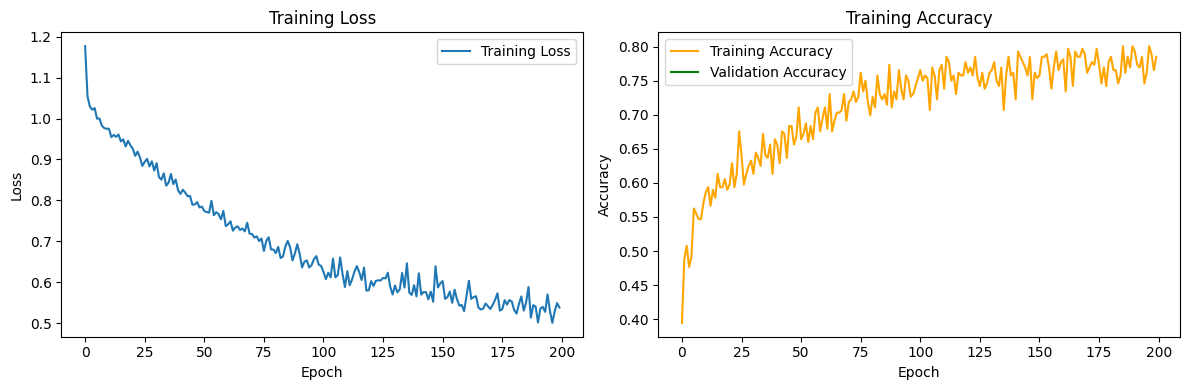


Fold 1/5
Epoch 0, Loss: 1.4077, Accuracy: 0.3125
Epoch 100, Loss: 0.9310, Accuracy: 0.6289
Epoch 200, Loss: 0.7884, Accuracy: 0.7031
Epoch 300, Loss: 0.6875, Accuracy: 0.7188
Epoch 400, Loss: 0.6150, Accuracy: 0.7773
Validation Accuracy: 0.6875
Validation Loss: 0.7359

Fold 2/5
Epoch 0, Loss: 1.1187, Accuracy: 0.3945
Epoch 100, Loss: 0.8747, Accuracy: 0.6680
Epoch 200, Loss: 0.7407, Accuracy: 0.7188
Epoch 300, Loss: 0.6393, Accuracy: 0.7188
Epoch 400, Loss: 0.5949, Accuracy: 0.7500
Validation Accuracy: 0.7292
Validation Loss: 0.6682

Fold 3/5
Epoch 0, Loss: 1.3021, Accuracy: 0.3320
Epoch 100, Loss: 0.7853, Accuracy: 0.7148
Epoch 200, Loss: 0.6630, Accuracy: 0.7500
Epoch 300, Loss: 0.6038, Accuracy: 0.7461
Epoch 400, Loss: 0.5658, Accuracy: 0.7734
Validation Accuracy: 0.7083
Validation Loss: 0.8060

Fold 4/5
Epoch 0, Loss: 1.5138, Accuracy: 0.3477
Epoch 100, Loss: 0.8077, Accuracy: 0.6641
Epoch 200, Loss: 0.6518, Accuracy: 0.7227
Epoch 300, Loss: 0.5677, Accuracy: 0.7734
Epoch 400, Los

In [123]:
if __name__ == "__main__":
    # Create and train model
    model = MLP(input_size=X_train010.shape[1], hidden_size1=64, hidden_size2=32, output_size=3)
    history = model.train(X_train010, y_train010, X_val=None, Y_val=None, batch_size=32, epochs=200)

    # Plot training history
    plt.figure(figsize=(12, 4))

    # Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    if 'val_loss' in history:
        plt.plot(history['val_loss'], label='Validation Loss', color='red')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Training Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Training Accuracy', color="orange")
    if 'val_accuracy' in history:
        plt.plot(history['val_accuracy'], label='Validation Accuracy', color='green')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Perform cross-validation
    cv_results = cross_validate(X_train010, y_train010, MLP, k=5, epochs=500)

Average Cross-Validation Accuracy: 0.7042
Average Cross-Validation Loss: 0.7331


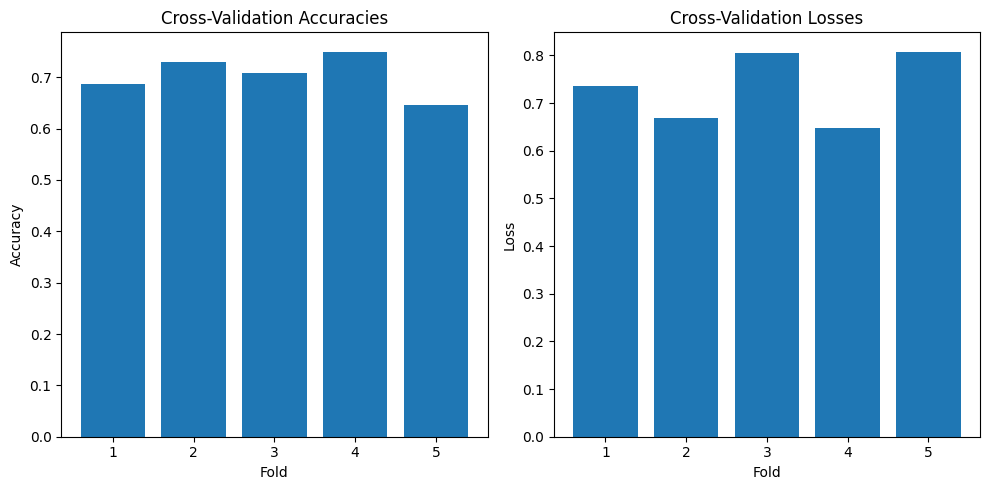

Epoch 0, Loss: 1.2275, Accuracy: 0.2852
Epoch 100, Loss: 0.8816, Accuracy: 0.6518
Epoch 200, Loss: 0.7106, Accuracy: 0.7316
Epoch 300, Loss: 0.6248, Accuracy: 0.7606
Epoch 400, Loss: 0.5750, Accuracy: 0.7751
Epoch 500, Loss: 0.5465, Accuracy: 0.7746
Epoch 600, Loss: 0.5109, Accuracy: 0.7801
Epoch 700, Loss: 0.5108, Accuracy: 0.7790
Epoch 800, Loss: 0.4840, Accuracy: 0.7785
Epoch 900, Loss: 0.4675, Accuracy: 0.7997
Test Accuracy: 0.6500, Test Loss: 0.7362


In [124]:
accuracies = [result['accuracy'] for result in cv_results]
losses = [result['loss'] for result in cv_results]

# Average metrics
avg_accuracy = np.mean(accuracies)
avg_loss = np.mean(losses)

print(f'Average Cross-Validation Accuracy: {avg_accuracy:.4f}')
print(f'Average Cross-Validation Loss: {avg_loss:.4f}')

# Plotting cross-validation results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(accuracies) + 1), accuracies)
plt.title('Cross-Validation Accuracies')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(range(1, len(losses) + 1), losses)
plt.title('Cross-Validation Losses')
plt.xlabel('Fold')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Retrain on full dataset if satisfied with results
final_model = MLP(input_size=100, hidden_size1=64, hidden_size2=32, output_size=3)
final_history = final_model.train(X_train010, y_train010)

# Evaluate on test set
test_results = final_model.evaluate(X_test010, y_test010)
print(f'Test Accuracy: {test_results["accuracy"]:.4f}, Test Loss: {test_results["loss"]:.4f}')

Epoch 0, Loss: 1.1963, Accuracy: 0.2930
Epoch 100, Loss: 0.3841, Accuracy: 0.8516


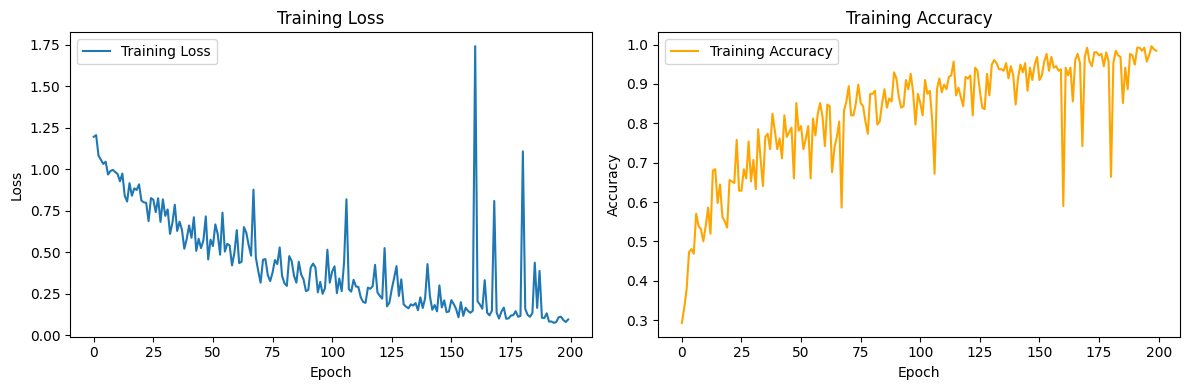


Fold 1/5
Epoch 0, Loss: 1.0839, Accuracy: 0.4180
Epoch 100, Loss: 0.5959, Accuracy: 0.8047
Epoch 200, Loss: 0.3611, Accuracy: 0.8906
Epoch 300, Loss: 0.2279, Accuracy: 0.9414
Epoch 400, Loss: 0.2391, Accuracy: 0.9023
Validation Accuracy: 0.9167
Validation Loss: 0.2404

Fold 2/5
Epoch 0, Loss: 1.5335, Accuracy: 0.2578
Epoch 100, Loss: 0.7424, Accuracy: 0.6367
Epoch 200, Loss: 0.5157, Accuracy: 0.8125
Epoch 300, Loss: 0.2518, Accuracy: 0.9297
Epoch 400, Loss: 0.5426, Accuracy: 0.7578
Validation Accuracy: 0.9167
Validation Loss: 0.2737

Fold 3/5
Epoch 0, Loss: 1.4754, Accuracy: 0.3516
Epoch 100, Loss: 0.5988, Accuracy: 0.8047
Epoch 200, Loss: 0.3371, Accuracy: 0.9180
Epoch 300, Loss: 0.3534, Accuracy: 0.8594
Epoch 400, Loss: 0.1530, Accuracy: 0.9648
Validation Accuracy: 0.8333
Validation Loss: 0.4352

Fold 4/5
Epoch 0, Loss: 2.2272, Accuracy: 0.2656
Epoch 100, Loss: 0.5376, Accuracy: 0.8281
Epoch 200, Loss: 0.5761, Accuracy: 0.7344
Epoch 300, Loss: 0.2981, Accuracy: 0.9062
Epoch 400, Los

In [201]:
if __name__ == "__main__":
    # Create and train model
    model = MLP(input_size=X_train028.shape[1], hidden_size1=64, hidden_size2=32, output_size=3)
    history = model.train(X_train028, y_train028, X_val=None, Y_val=None, batch_size=32, epochs=200)

    # Plot training history
    plt.figure(figsize=(12, 4))

    # Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    if 'val_loss' in history:
        plt.plot(history['val_loss'], label='Validation Loss', color='red')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Training Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Training Accuracy', color="orange")
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Perform cross-validation
    cv_results = cross_validate(X_train028, y_train028, MLP, k=5, epochs=500)

Average Cross-Validation Accuracy: 0.8667
Average Cross-Validation Loss: 0.4037


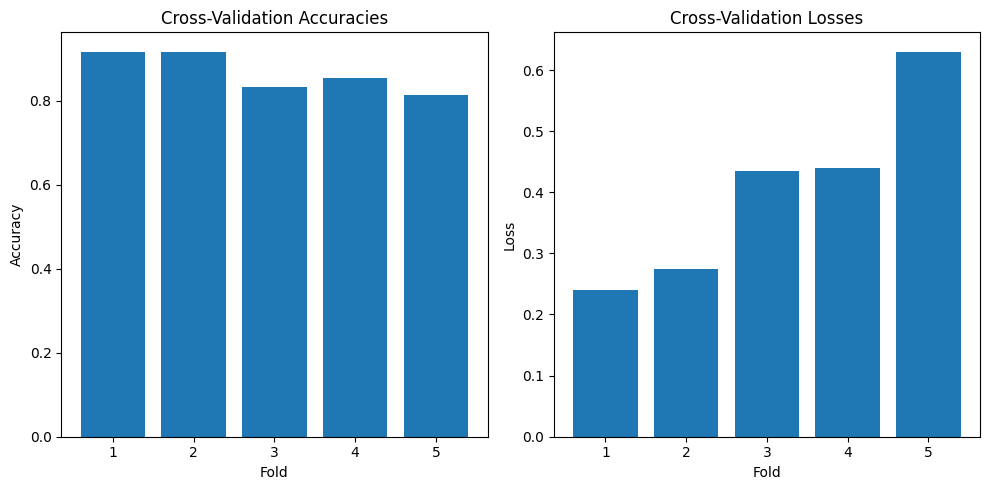

Epoch 0, Loss: 1.7313, Accuracy: 0.3092
Epoch 100, Loss: 0.6273, Accuracy: 0.7600
Epoch 200, Loss: 0.4257, Accuracy: 0.8164
Epoch 300, Loss: 0.3420, Accuracy: 0.8560
Epoch 400, Loss: 0.2918, Accuracy: 0.8873
Epoch 500, Loss: 0.1111, Accuracy: 0.9760
Epoch 600, Loss: 0.0777, Accuracy: 0.9916
Epoch 700, Loss: 0.0654, Accuracy: 0.9955
Epoch 800, Loss: 0.0392, Accuracy: 1.0000
Epoch 900, Loss: 0.0289, Accuracy: 1.0000
Test Accuracy: 0.9167, Test Loss: 0.2027


In [202]:
accuracies = [result['accuracy'] for result in cv_results]
losses = [result['loss'] for result in cv_results]

# Average metrics
avg_accuracy = np.mean(accuracies)
avg_loss = np.mean(losses)

print(f'Average Cross-Validation Accuracy: {avg_accuracy:.4f}')
print(f'Average Cross-Validation Loss: {avg_loss:.4f}')

# Plotting cross-validation results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(accuracies) + 1), accuracies)
plt.title('Cross-Validation Accuracies')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(range(1, len(losses) + 1), losses)
plt.title('Cross-Validation Losses')
plt.xlabel('Fold')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Retrain on full dataset if satisfied with results
final_model = MLP(input_size=784, hidden_size1=64, hidden_size2=32, output_size=3)
final_history = final_model.train(X_train028, y_train028)

# Evaluate on test set
test_results = final_model.evaluate(X_test028, y_test028)
print(f'Test Accuracy: {test_results["accuracy"]:.4f}, Test Loss: {test_results["loss"]:.4f}')

Epoch 0, Loss: 2.2243, Accuracy: 0.2874
Epoch 100, Loss: 0.6006, Accuracy: 0.8309


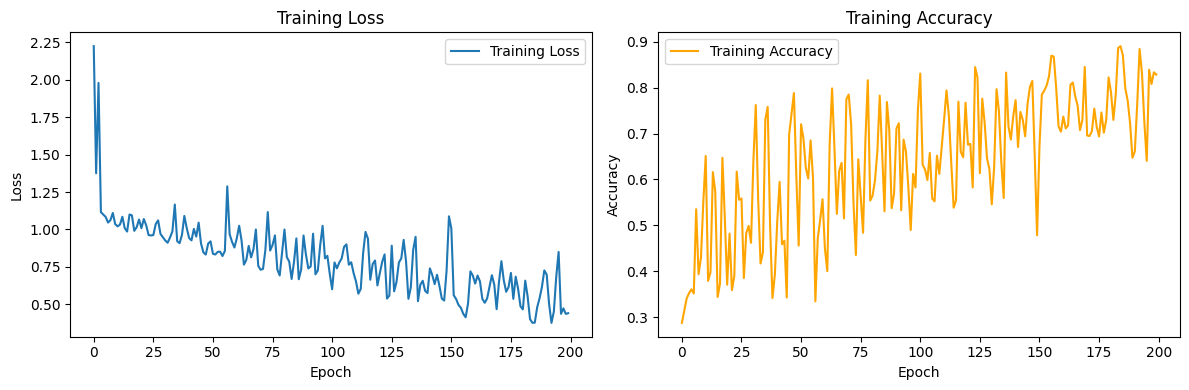


Fold 1/5
Epoch 0, Loss: 2.3608, Accuracy: 0.3672
Epoch 100, Loss: 1.1334, Accuracy: 0.4727
Epoch 200, Loss: 0.7485, Accuracy: 0.6797
Epoch 300, Loss: 0.5262, Accuracy: 0.7617
Epoch 400, Loss: 0.1565, Accuracy: 0.9414
Validation Accuracy: 0.8750
Validation Loss: 0.2611

Fold 2/5
Epoch 0, Loss: 1.5383, Accuracy: 0.3281
Epoch 100, Loss: 0.7525, Accuracy: 0.7617
Epoch 200, Loss: 0.8718, Accuracy: 0.6016
Epoch 300, Loss: 0.3679, Accuracy: 0.8633
Epoch 400, Loss: 0.6157, Accuracy: 0.7969
Validation Accuracy: 0.8333
Validation Loss: 0.4356

Fold 3/5
Epoch 0, Loss: 3.7374, Accuracy: 0.3164
Epoch 100, Loss: 0.8788, Accuracy: 0.5781
Epoch 200, Loss: 0.7792, Accuracy: 0.6719
Epoch 300, Loss: 0.6704, Accuracy: 0.7344
Epoch 400, Loss: 0.2229, Accuracy: 0.9336
Validation Accuracy: 0.9583
Validation Loss: 0.2264

Fold 4/5
Epoch 0, Loss: 1.5848, Accuracy: 0.3086
Epoch 100, Loss: 0.9625, Accuracy: 0.5000
Epoch 200, Loss: 0.8413, Accuracy: 0.5859
Epoch 300, Loss: 0.3791, Accuracy: 0.8711
Epoch 400, Los

In [203]:
if __name__ == "__main__":
    # Create and train model
    model = MLP(input_size=X_train064.shape[1], hidden_size1=128, hidden_size2=64, output_size=3)
    history = model.train(X_train064, y_train064, X_val=None, Y_val=None, batch_size=128, epochs=200)

    # Plot training history
    plt.figure(figsize=(12, 4))

    # Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    if 'val_loss' in history:
        plt.plot(history['val_loss'], label='Validation Loss', color='red')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Training Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Training Accuracy', color="orange")
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Perform cross-validation
    cv_results = cross_validate(X_train064, y_train064, MLP, k=5, epochs=500)

Average Cross-Validation Accuracy: 0.8792
Average Cross-Validation Loss: 0.3159


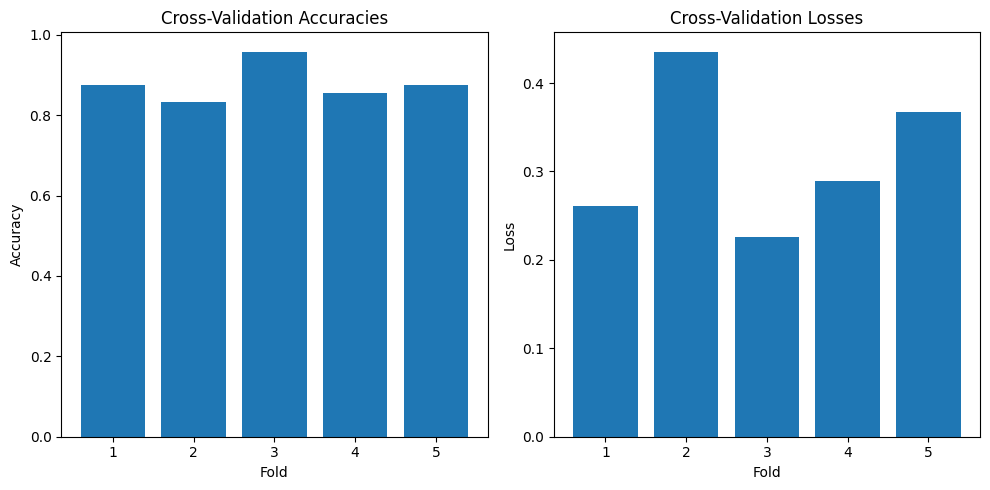

Epoch 0, Loss: 1.4627, Accuracy: 0.3560
Epoch 100, Loss: 0.6861, Accuracy: 0.7377
Epoch 200, Loss: 0.5965, Accuracy: 0.7405
Epoch 300, Loss: 0.5287, Accuracy: 0.7662
Epoch 400, Loss: 0.1958, Accuracy: 0.9297
Epoch 500, Loss: 0.7649, Accuracy: 0.6786
Epoch 600, Loss: 0.1477, Accuracy: 0.9749
Epoch 700, Loss: 0.0915, Accuracy: 0.9827
Epoch 800, Loss: 0.5239, Accuracy: 0.7472
Epoch 900, Loss: 0.1985, Accuracy: 0.9721
Test Accuracy: 0.9000, Test Loss: 0.3022


In [204]:
accuracies = [result['accuracy'] for result in cv_results]
losses = [result['loss'] for result in cv_results]

# Average metrics
avg_accuracy = np.mean(accuracies)
avg_loss = np.mean(losses)

print(f'Average Cross-Validation Accuracy: {avg_accuracy:.4f}')
print(f'Average Cross-Validation Loss: {avg_loss:.4f}')

# Plotting cross-validation results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(accuracies) + 1), accuracies)
plt.title('Cross-Validation Accuracies')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(range(1, len(losses) + 1), losses)
plt.title('Cross-Validation Losses')
plt.xlabel('Fold')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Retrain on full dataset if satisfied with results
final_model = MLP(input_size=4096, hidden_size1=64, hidden_size2=32, output_size=3)
final_history = final_model.train(X_train064, y_train064)

# Evaluate on test set
test_results = final_model.evaluate(X_test064, y_test064)
print(f'Test Accuracy: {test_results["accuracy"]:.4f}, Test Loss: {test_results["loss"]:.4f}')

Epoch 0, Loss: 1.5908, Accuracy: 0.2115
Epoch 100, Loss: 0.1284, Accuracy: 0.9916


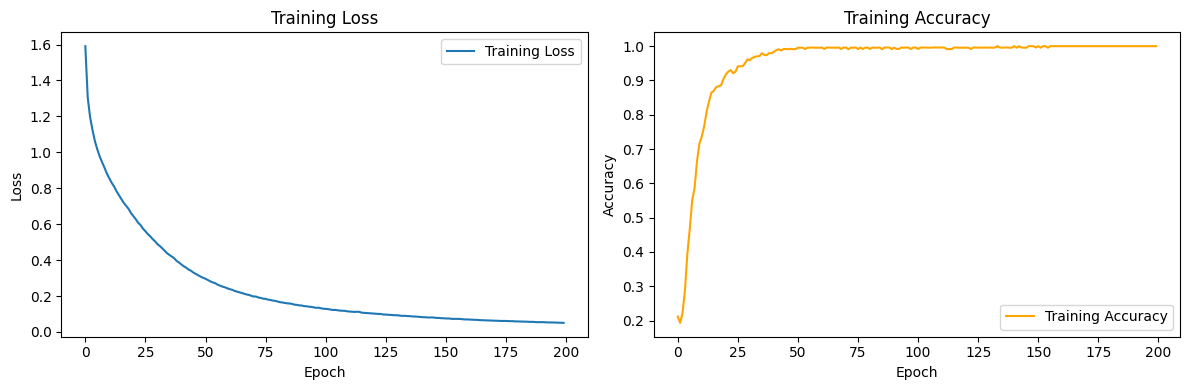


Fold 1/5
Epoch 0, Loss: 1.9329, Accuracy: 0.3125
Epoch 100, Loss: 0.1451, Accuracy: 0.9961
Validation Accuracy: 1.0000
Validation Loss: 0.0597

Fold 2/5
Epoch 0, Loss: 1.4912, Accuracy: 0.3359
Epoch 100, Loss: 0.2037, Accuracy: 0.9844
Validation Accuracy: 0.9792
Validation Loss: 0.1369

Fold 3/5
Epoch 0, Loss: 1.4986, Accuracy: 0.3672
Epoch 100, Loss: 0.1780, Accuracy: 0.9727
Validation Accuracy: 1.0000
Validation Loss: 0.0676

Fold 4/5
Epoch 0, Loss: 1.2519, Accuracy: 0.3828
Epoch 100, Loss: 0.1495, Accuracy: 0.9922
Validation Accuracy: 0.9792
Validation Loss: 0.1059

Fold 5/5
Epoch 0, Loss: 1.1596, Accuracy: 0.3984
Epoch 100, Loss: 0.1599, Accuracy: 0.9805
Validation Accuracy: 0.9792
Validation Loss: 0.0900

Average Cross-Validation Results:
Accuracy: 0.9875 ± 0.0102
Loss: 0.0920 ± 0.0278


In [210]:
if __name__ == "__main__":
    # Create and train model
    model = MLP(input_size=X_train110.shape[1], hidden_size1=64, hidden_size2=32, output_size=3)
    history = model.train(X_train110, y_train110, X_val=None, Y_val=None, batch_size=128, epochs=200)

    # Plot training history
    plt.figure(figsize=(12, 4))

    # Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    if 'val_loss' in history:
        plt.plot(history['val_loss'], label='Validation Loss', color='red')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Training Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Training Accuracy', color="orange")
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Perform cross-validation
    cv_results = cross_validate(X_train110, y_train110, MLP, k=5, epochs=200)

Average Cross-Validation Accuracy: 0.9875
Average Cross-Validation Loss: 0.0920


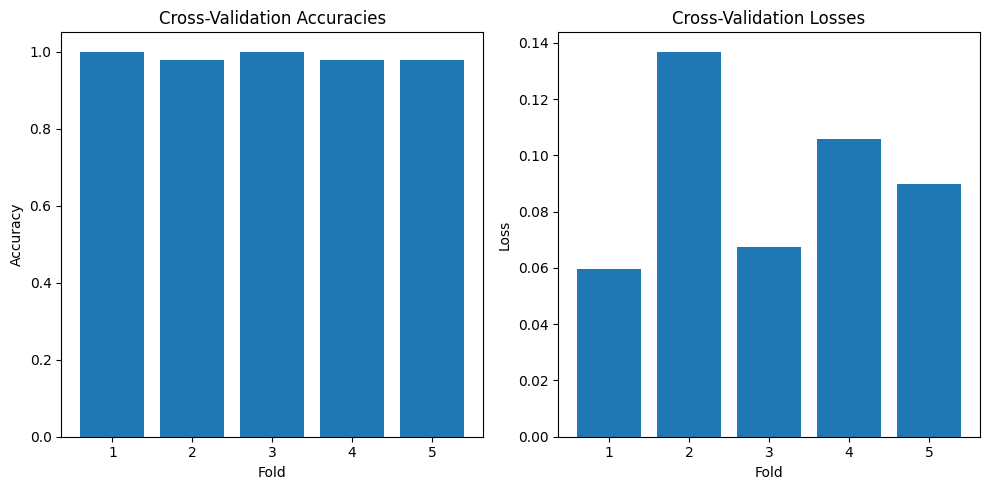

Epoch 0, Loss: 1.3097, Accuracy: 0.3410
Epoch 100, Loss: 0.1786, Accuracy: 0.9833
Epoch 200, Loss: 0.0681, Accuracy: 1.0000
Epoch 300, Loss: 0.0372, Accuracy: 1.0000
Epoch 400, Loss: 0.0249, Accuracy: 1.0000
Epoch 500, Loss: 0.0183, Accuracy: 1.0000
Epoch 600, Loss: 0.0137, Accuracy: 1.0000
Epoch 700, Loss: 0.0112, Accuracy: 1.0000
Epoch 800, Loss: 0.0092, Accuracy: 1.0000
Epoch 900, Loss: 0.0078, Accuracy: 1.0000
Test Accuracy: 0.9667, Test Loss: 0.0498


In [211]:
accuracies = [result['accuracy'] for result in cv_results]
losses = [result['loss'] for result in cv_results]

# Average metrics
avg_accuracy = np.mean(accuracies)
avg_loss = np.mean(losses)

print(f'Average Cross-Validation Accuracy: {avg_accuracy:.4f}')
print(f'Average Cross-Validation Loss: {avg_loss:.4f}')

# Plotting cross-validation results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(accuracies) + 1), accuracies)
plt.title('Cross-Validation Accuracies')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(range(1, len(losses) + 1), losses)
plt.title('Cross-Validation Losses')
plt.xlabel('Fold')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Retrain on full dataset if satisfied with results
final_model = MLP(input_size=100, hidden_size1=64, hidden_size2=32, output_size=3)
final_history = final_model.train(X_train110, y_train110)

# Evaluate on test set
test_results = final_model.evaluate(X_test110, y_test110)
print(f'Test Accuracy: {test_results["accuracy"]:.4f}, Test Loss: {test_results["loss"]:.4f}')

Epoch 0, Loss: 1.0992, Accuracy: 0.4492
Epoch 100, Loss: 0.0399, Accuracy: 1.0000


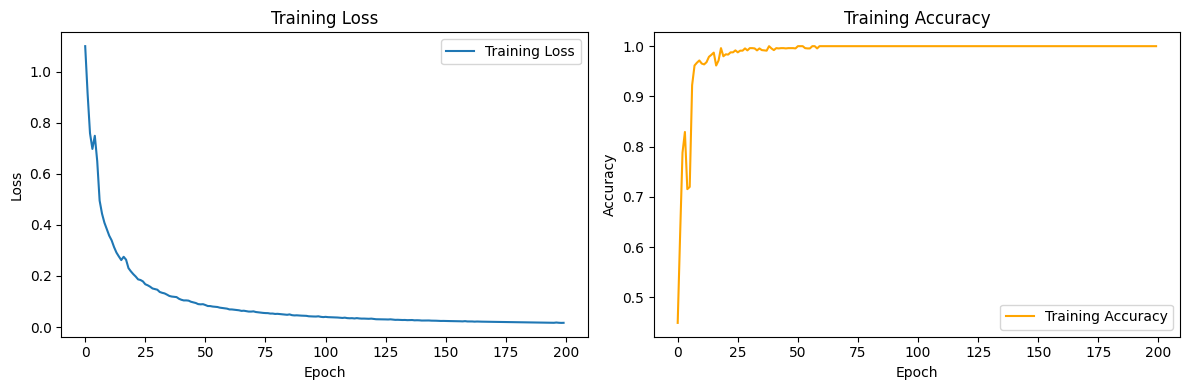


Fold 1/5
Epoch 0, Loss: 2.0696, Accuracy: 0.3477
Epoch 100, Loss: 0.0392, Accuracy: 1.0000
Validation Accuracy: 0.9792
Validation Loss: 0.0382

Fold 2/5
Epoch 0, Loss: 1.1711, Accuracy: 0.3008
Epoch 100, Loss: 0.0374, Accuracy: 1.0000
Validation Accuracy: 0.9583
Validation Loss: 0.0787

Fold 3/5
Epoch 0, Loss: 1.4159, Accuracy: 0.3516
Epoch 100, Loss: 0.0345, Accuracy: 1.0000
Validation Accuracy: 1.0000
Validation Loss: 0.0466

Fold 4/5
Epoch 0, Loss: 1.4779, Accuracy: 0.3320
Epoch 100, Loss: 0.0565, Accuracy: 1.0000
Validation Accuracy: 1.0000
Validation Loss: 0.0200

Fold 5/5
Epoch 0, Loss: 1.9718, Accuracy: 0.2812
Epoch 100, Loss: 0.0431, Accuracy: 1.0000
Validation Accuracy: 1.0000
Validation Loss: 0.0177

Average Cross-Validation Results:
Accuracy: 0.9875 ± 0.0167
Loss: 0.0402 ± 0.0221


In [212]:
if __name__ == "__main__":
    # Create and train model
    model = MLP(input_size=X_train128.shape[1], hidden_size1=64, hidden_size2=32, output_size=3)
    history = model.train(X_train128, y_train028, X_val=None, Y_val=None, batch_size=128, epochs=200)

    # Plot training history
    plt.figure(figsize=(12, 4))

    # Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    if 'val_loss' in history:
        plt.plot(history['val_loss'], label='Validation Loss', color='red')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Training Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Training Accuracy', color="orange")
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Perform cross-validation
    cv_results = cross_validate(X_train128, y_train128, MLP, k=5, epochs=200)

Average Cross-Validation Accuracy: 0.9875
Average Cross-Validation Loss: 0.0402


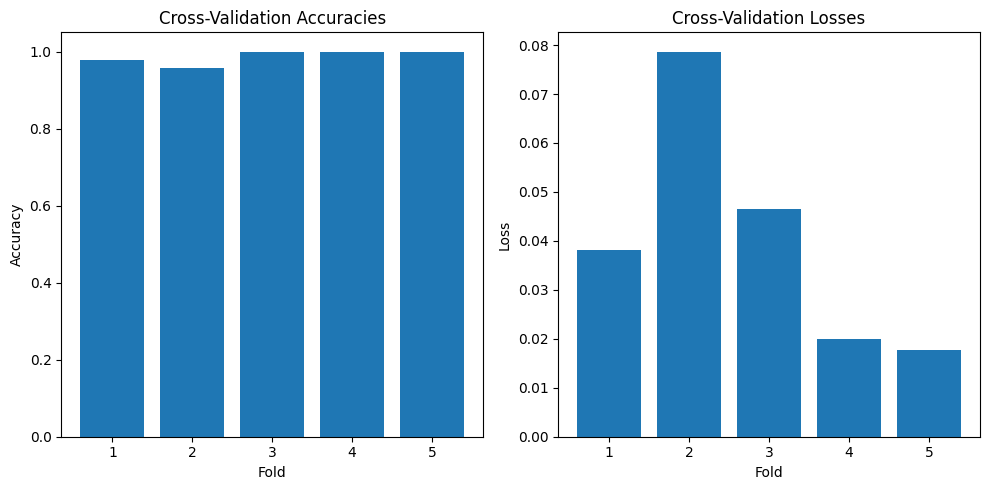

Epoch 0, Loss: 1.2170, Accuracy: 0.2684
Epoch 100, Loss: 0.0452, Accuracy: 1.0000
Epoch 200, Loss: 0.0170, Accuracy: 1.0000
Epoch 300, Loss: 0.0098, Accuracy: 1.0000
Epoch 400, Loss: 0.0064, Accuracy: 1.0000
Epoch 500, Loss: 0.0047, Accuracy: 1.0000
Epoch 600, Loss: 0.0037, Accuracy: 1.0000
Epoch 700, Loss: 0.0030, Accuracy: 1.0000
Epoch 800, Loss: 0.0025, Accuracy: 1.0000
Epoch 900, Loss: 0.0021, Accuracy: 1.0000
Test Accuracy: 0.9833, Test Loss: 0.0540


In [213]:
accuracies = [result['accuracy'] for result in cv_results]
losses = [result['loss'] for result in cv_results]

# Average metrics
avg_accuracy = np.mean(accuracies)
avg_loss = np.mean(losses)

print(f'Average Cross-Validation Accuracy: {avg_accuracy:.4f}')
print(f'Average Cross-Validation Loss: {avg_loss:.4f}')

# Plotting cross-validation results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(accuracies) + 1), accuracies)
plt.title('Cross-Validation Accuracies')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(range(1, len(losses) + 1), losses)
plt.title('Cross-Validation Losses')
plt.xlabel('Fold')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Retrain on full dataset if satisfied with results
final_model = MLP(input_size=784, hidden_size1=64, hidden_size2=32, output_size=3)
final_history = final_model.train(X_train128, y_train128)

# Evaluate on test set
test_results = final_model.evaluate(X_test128, y_test128)
print(f'Test Accuracy: {test_results["accuracy"]:.4f}, Test Loss: {test_results["loss"]:.4f}')

Epoch 0, Loss: 1.5270, Accuracy: 0.3834
Epoch 100, Loss: 0.0281, Accuracy: 1.0000


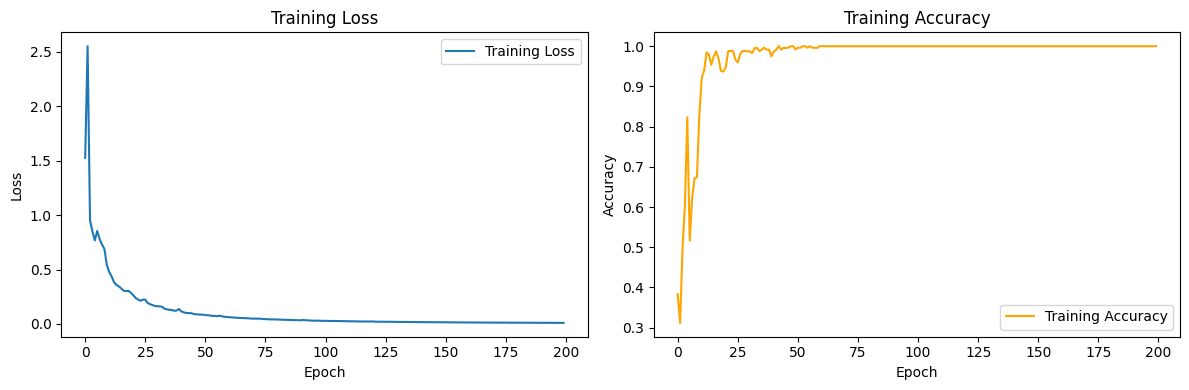


Fold 1/5
Epoch 0, Loss: 1.8742, Accuracy: 0.2227
Epoch 100, Loss: 0.0189, Accuracy: 1.0000
Validation Accuracy: 1.0000
Validation Loss: 0.0163

Fold 2/5
Epoch 0, Loss: 2.9317, Accuracy: 0.2344
Epoch 100, Loss: 0.0192, Accuracy: 1.0000
Validation Accuracy: 1.0000
Validation Loss: 0.0207

Fold 3/5
Epoch 0, Loss: 2.3277, Accuracy: 0.3047
Epoch 100, Loss: 0.0257, Accuracy: 1.0000
Validation Accuracy: 1.0000
Validation Loss: 0.0183

Fold 4/5
Epoch 0, Loss: 1.1194, Accuracy: 0.4102
Epoch 100, Loss: 0.0212, Accuracy: 1.0000
Validation Accuracy: 1.0000
Validation Loss: 0.0164

Fold 5/5
Epoch 0, Loss: 1.1807, Accuracy: 0.3359
Epoch 100, Loss: 0.0145, Accuracy: 1.0000
Validation Accuracy: 0.9792
Validation Loss: 0.0379

Average Cross-Validation Results:
Accuracy: 0.9958 ± 0.0083
Loss: 0.0219 ± 0.0081


In [214]:
if __name__ == "__main__":
    # Create and train model
    model = MLP(input_size=X_train164.shape[1], hidden_size1=64, hidden_size2=32, output_size=3)
    history = model.train(X_train164, y_train164, X_val=None, Y_val=None, batch_size=128, epochs=200)

    # Plot training history
    plt.figure(figsize=(12, 4))

    # Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    if 'val_loss' in history:
        plt.plot(history['val_loss'], label='Validation Loss', color='red')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Training Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Training Accuracy', color="orange")
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Perform cross-validation
    cv_results = cross_validate(X_train164, y_train164, MLP, k=5, epochs=200)

Average Cross-Validation Accuracy: 0.9958
Average Cross-Validation Loss: 0.0219


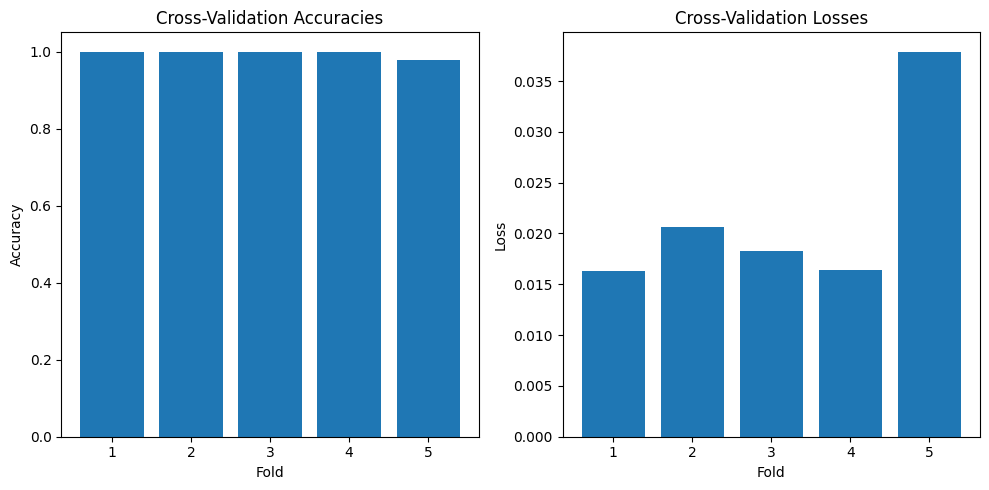

Epoch 0, Loss: 1.6412, Accuracy: 0.3041
Epoch 100, Loss: 0.0235, Accuracy: 1.0000
Epoch 200, Loss: 0.0087, Accuracy: 1.0000
Epoch 300, Loss: 0.0047, Accuracy: 1.0000
Epoch 400, Loss: 0.0031, Accuracy: 1.0000
Epoch 500, Loss: 0.0023, Accuracy: 1.0000
Epoch 600, Loss: 0.0018, Accuracy: 1.0000
Epoch 700, Loss: 0.0015, Accuracy: 1.0000
Epoch 800, Loss: 0.0013, Accuracy: 1.0000
Epoch 900, Loss: 0.0011, Accuracy: 1.0000
Test Accuracy: 0.9667, Test Loss: 0.0690


In [215]:
accuracies = [result['accuracy'] for result in cv_results]
losses = [result['loss'] for result in cv_results]

# Average metrics
avg_accuracy = np.mean(accuracies)
avg_loss = np.mean(losses)

print(f'Average Cross-Validation Accuracy: {avg_accuracy:.4f}')
print(f'Average Cross-Validation Loss: {avg_loss:.4f}')

# Plotting cross-validation results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(accuracies) + 1), accuracies)
plt.title('Cross-Validation Accuracies')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(range(1, len(losses) + 1), losses)
plt.title('Cross-Validation Losses')
plt.xlabel('Fold')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Retrain on full dataset if satisfied with results
final_model = MLP(input_size=4096, hidden_size1=64, hidden_size2=32, output_size=3)
final_history = final_model.train(X_train164, y_train164)

# Evaluate on test set
test_results = final_model.evaluate(X_test164, y_test164)
print(f'Test Accuracy: {test_results["accuracy"]:.4f}, Test Loss: {test_results["loss"]:.4f}')

# Built-in Library

## Feature Set 1

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.3142 - loss: 1.1446 - val_accuracy: 0.3750 - val_loss: 1.0909
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4045 - loss: 1.0806 - val_accuracy: 0.4792 - val_loss: 1.0897
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4800 - loss: 1.0572 - val_accuracy: 0.3958 - val_loss: 1.0890
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4688 - loss: 1.0427 - val_accuracy: 0.4583 - val_loss: 1.0719
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5451 - loss: 1.0301 - val_accuracy: 0.4375 - val_loss: 1.0499
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6085 - loss: 1.0159 - val_accuracy: 0.5833 - val_loss: 1.0618
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6076 - loss: 0.9996 - val_accuracy: 0.6042 - val_loss: 1.0493
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6458 - loss: 0.9811 - val_accuracy: 0.5625 - val_loss: 1.0256
Epo

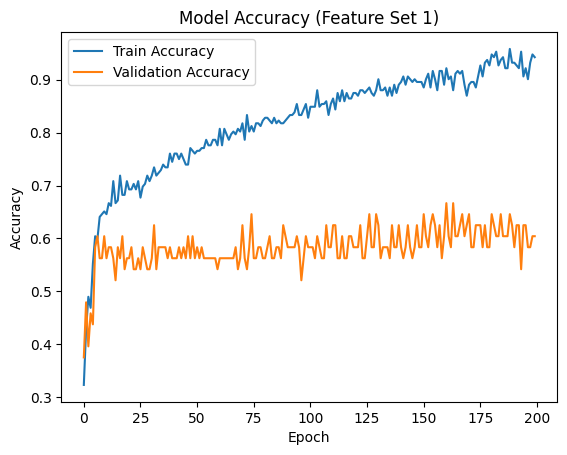

In [125]:
# Convert labels to one-hot encoding
y_train010 = to_categorical(y_train010, num_classes=3)
y_test010 = to_categorical(y_test010, num_classes=3)

# Step 3: Build the model
model = Sequential([
    layers.Dense(100, activation='relu', input_shape=(10 * 10,)),  # First hidden layer
    layers.Dense(50, activation='relu'),                          # First hidden layer
    layers.Dense(50, activation='relu'),                          # Second hidden layer
    layers.Dense(3, activation='softmax')                         # Output layer
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
start_time = time.time()  # Record the start time
history = model.fit(X_train010, y_train010, epochs=200, batch_size=128,
                    validation_split=0.2)
end_time = time.time()  # Record the end time
total_training_time = end_time - start_time  # Calculate total training time

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test010, y_test010)
print(f'Test accuracy: {test_accuracy:.4f}')


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Feature Set 1)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [126]:
total_training_time

21.599149227142334

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Precision: 0.7050
Recall: 0.7000
F1 Score: 0.7002


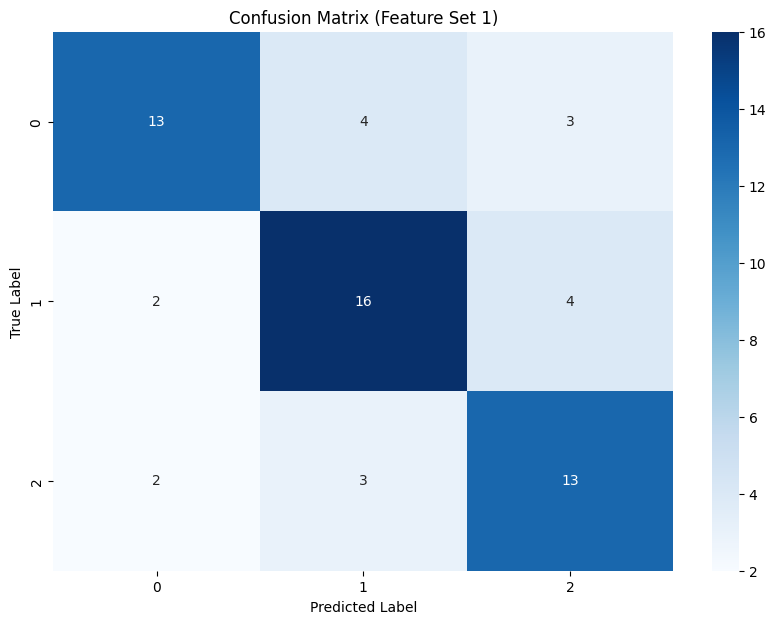

In [131]:
# Make predictions
y_pred_prob = model.predict(X_test010)  # Get predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test010, axis=1)  # Convert one-hot encoded true labels to class labels

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(3), yticklabels=np.arange(3))
plt.title('Confusion Matrix (Feature Set 1)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Feature Set 2

In [154]:
# Convert labels to one-hot encoding
y_train028 = to_categorical(y_train028, num_classes=3)
y_test028 = to_categorical(y_test028, num_classes=3)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.2847 - loss: 1.6706 - val_accuracy: 0.2500 - val_loss: 1.1516
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3490 - loss: 1.2324 - val_accuracy: 0.3333 - val_loss: 1.0791
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3281 - loss: 1.1983 - val_accuracy: 0.2083 - val_loss: 1.3608
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3663 - loss: 1.1507 - val_accuracy: 0.3333 - val_loss: 1.0924
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3689 - loss: 1.0689 - val_accuracy: 0.4583 - val_loss: 1.0571
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3038 - loss: 1.0816 - val_accuracy: 0.5417 - val_loss: 1.0580
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6345 - loss: 1.0315 - val_accuracy: 0.3958 - val_loss: 1.1163
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5191 - loss: 1.0279 - val_accuracy: 0.2500 - val_loss: 1.0660
Epo

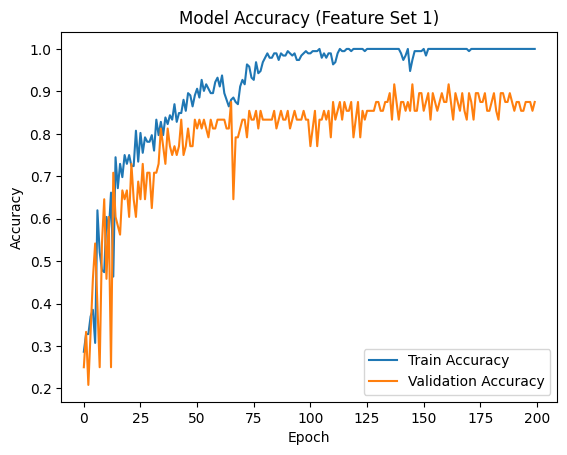

In [155]:
# Build the model
model = Sequential([
    layers.Dense(784, activation='relu', input_shape=(28 * 28,)),  # First hidden layer
    layers.Dense(128, activation='relu'),                          # First hidden layer
    layers.Dense(64, activation='relu'),                          # Second hidden layer
    layers.Dense(3, activation='softmax')                         # Output layer
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
start_time2 = time.time()  # Record the start time
history = model.fit(X_train028, y_train028, epochs=200, batch_size=128,
                    validation_split=0.2)
end_time2 = time.time()  # Record the end time
total_training_time2 = end_time2 - start_time2  # Calculate total training time

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test028, y_test028)
print(f'Test accuracy: {test_accuracy:.4f}')

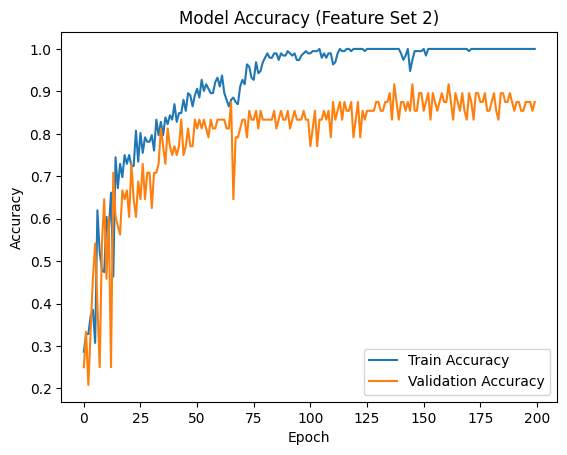

In [156]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Feature Set 2)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Precision: 0.9333
Recall: 0.9333
F1 Score: 0.9333
32.344507694244385


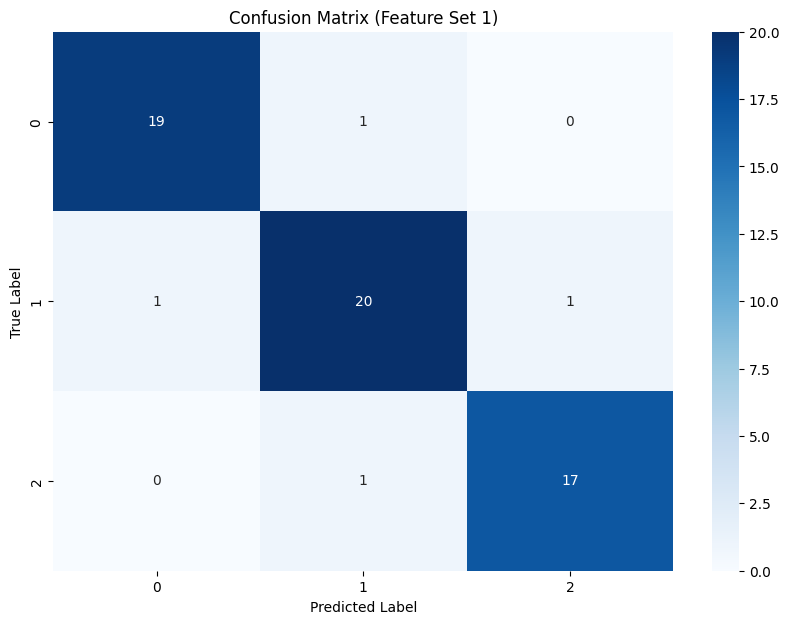

In [158]:
# Make predictions
y_pred_prob028 = model.predict(X_test028)  # Get predicted probabilities
y_pred028 = np.argmax(y_pred_prob028, axis=1)  # Convert probabilities to class labels
y_true028 = np.argmax(y_test028, axis=1)  # Convert one-hot encoded true labels to class labels

# Calculate precision, recall, and F1 score
precision = precision_score(y_true028, y_pred028, average='weighted')
recall = recall_score(y_true028, y_pred028, average='weighted')
f1 = f1_score(y_true028, y_pred028, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(total_training_time2)

# Plot confusion matrix
cm = confusion_matrix(y_true028, y_pred028)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(3), yticklabels=np.arange(3))
plt.title('Confusion Matrix (Feature Set 2)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Feature Set 3

In [159]:
# Convert labels to one-hot encoding
y_train064 = to_categorical(y_train064, num_classes=3)
y_test064 = to_categorical(y_test064, num_classes=3)

In [161]:
# Build the model
model064 = Sequential([
    layers.Dense(4096, activation='relu', input_shape=(64 * 64,)),  # First hidden layer
    layers.Dense(128, activation='relu'),                          # First hidden layer
    layers.Dense(64, activation='relu'),                          # Second hidden layer
    layers.Dense(3, activation='softmax')                         # Output layer
])

# Step 4: Compile the model
model064.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
start_time3 = time.time()  # Record the start time
history3 = model064.fit(X_train064, y_train064, epochs=200, batch_size=128,
                    validation_split=0.2)
end_time3 = time.time()  # Record the end time
total_training_time3 = end_time3 - start_time3  # Calculate total training time

# Step 6: Evaluate the model
test_loss, test_accuracy = model064.evaluate(X_test064, y_test064)
print(f'Test accuracy: {test_accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3021 - loss: 4.4927 - val_accuracy: 0.4583 - val_loss: 8.1308
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step - accuracy: 0.3481 - loss: 8.6093 - val_accuracy: 0.4583 - val_loss: 3.6093
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 913ms/step - accuracy: 0.3411 - loss: 3.2177 - val_accuracy: 0.3333 - val_loss: 3.0532
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 809ms/step - accuracy: 0.3411 - loss: 3.5121 - val_accuracy: 0.2083 - val_loss: 5.2759
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 470ms/step - accuracy: 0.3611 - loss: 3.6443 - val_accuracy: 0.4583 - val_loss: 3.2155
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 471ms/step - accuracy: 0.3637 - loss: 4.2009 - val_accuracy: 0.3333 - val_loss: 4.1797
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 465ms/step - accuracy: 0.3238 - loss: 3.8861 - val_accuracy: 0.2083 - val_loss: 2.8886
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 489ms/step - accuracy: 0.3524 - loss: 3.0549 - val_accuracy: 0.2083 - val_

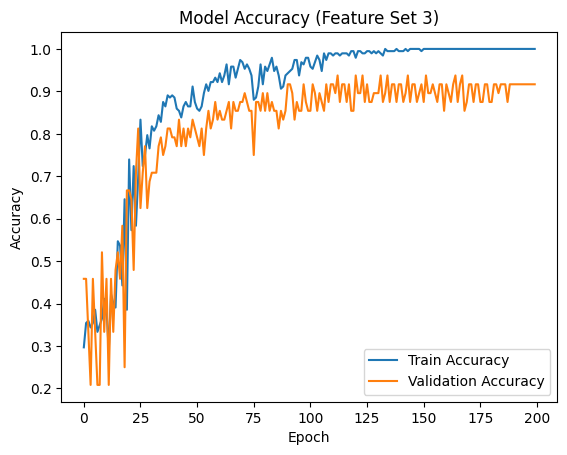

In [162]:
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Feature Set 3)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Precision: 0.9228
Recall: 0.9167
F1 Score: 0.9173
32.344507694244385


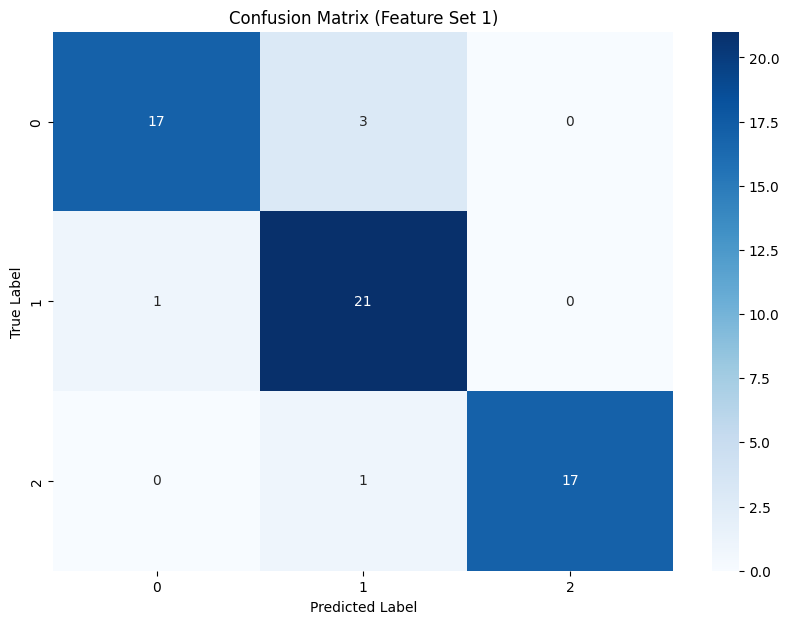

In [163]:
# Make predictions
y_pred_prob064 = model064.predict(X_test064)  # Get predicted probabilities
y_pred064 = np.argmax(y_pred_prob064, axis=1)  # Convert probabilities to class labels
y_true064 = np.argmax(y_test064, axis=1)  # Convert one-hot encoded true labels to class labels

# Calculate precision, recall, and F1 score
precision = precision_score(y_true064, y_pred064, average='weighted')
recall = recall_score(y_true064, y_pred064, average='weighted')
f1 = f1_score(y_true064, y_pred064, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(total_training_time2)

# Plot confusion matrix
cm = confusion_matrix(y_true064, y_pred064)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(3), yticklabels=np.arange(3))
plt.title('Confusion Matrix (Feature Set 1)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Feature Set 4

In [185]:
# Convert labels to one-hot encoding
y_train110 = to_categorical(y_train110, num_classes=3)
y_test110 = to_categorical(y_test110, num_classes=3)

In [186]:
# Build the model
model = Sequential([
    layers.Dense(100, activation='relu', input_shape=(10 * 10,)),  # First hidden layer
    layers.Dense(64, activation='relu'),                          # First hidden layer
    layers.Dense(32, activation='relu'),                          # Second hidden layer
    layers.Dense(3, activation='softmax')                         # Output layer
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
start_time = time.time()  # Record the start time
history = model.fit(X_train110, y_train110, epochs=200, batch_size=110,
                    validation_split=0.2)
end_time = time.time()  # Record the end time
total_training_time = end_time - start_time  # Calculate total training time

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test110, y_test110)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.3955 - loss: 1.1401 - val_accuracy: 0.4792 - val_loss: 1.0725
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6002 - loss: 0.9963 - val_accuracy: 0.6250 - val_loss: 0.9587
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7828 - loss: 0.9034 - val_accuracy: 0.7500 - val_loss: 0.8910
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8669 - loss: 0.8304 - val_accuracy: 0.7292 - val_loss: 0.8387
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8799 - loss: 0.7686 - val_accuracy: 0.7708 - val_loss: 0.7670
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8938 - loss: 0.7100 - val_accuracy: 0.8542 - val_loss: 0.6957
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9306 - loss: 0.6402 - val_accuracy: 0.8958 - val_loss: 0.6302
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9441 - loss: 0.5813 - val_accuracy: 0.9167 - val_loss: 0.5544
Epo

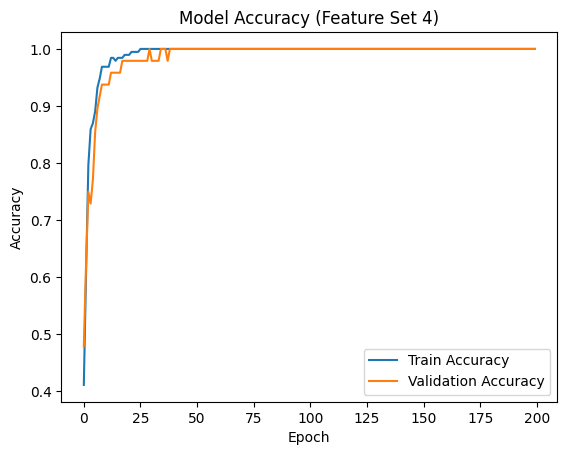

In [187]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Feature Set 4)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Precision: 0.9694
Recall: 0.9667
F1 Score: 0.9669
32.344507694244385


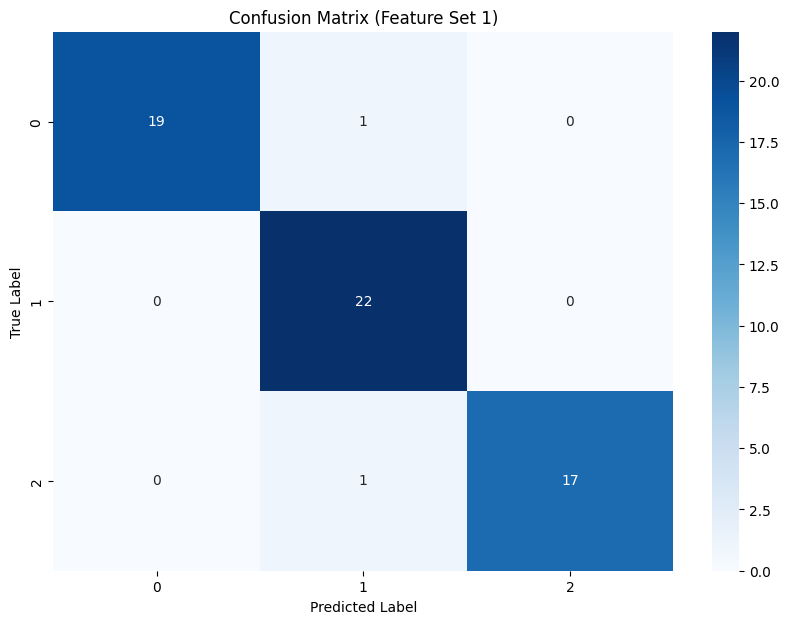

In [188]:
# Make predictions
y_pred_prob110 = model.predict(X_test110)  # Get predicted probabilities
y_pred110 = np.argmax(y_pred_prob110, axis=1)  # Convert probabilities to class labels
y_true110 = np.argmax(y_test110, axis=1)  # Convert one-hot encoded true labels to class labels

# Calculate precision, recall, and F1 score
precision = precision_score(y_true110, y_pred110, average='weighted')
recall = recall_score(y_true110, y_pred110, average='weighted')
f1 = f1_score(y_true110, y_pred110, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(total_training_time2)

# Plot confusion matrix
cm = confusion_matrix(y_true110, y_pred110)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(3), yticklabels=np.arange(3))
plt.title('Confusion Matrix (Feature Set 1)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Feature Set 5

In [189]:
# Convert labels to one-hot encoding
y_train128 = to_categorical(y_train128, num_classes=3)
y_test128 = to_categorical(y_test128, num_classes=3)

In [190]:
# Build the model
model = Sequential([
    layers.Dense(784, activation='relu', input_shape=(28 * 28,)),  # First hidden layer
    layers.Dense(128, activation='relu'),                          # First hidden layer
    layers.Dense(64, activation='relu'),                          # Second hidden layer
    layers.Dense(3, activation='softmax')                         # Output layer
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
start_time2 = time.time()  # Record the start time
history = model.fit(X_train128, y_train128, epochs=200, batch_size=128,
                    validation_split=0.2)
end_time2 = time.time()  # Record the end time
total_training_time2 = end_time2 - start_time2  # Calculate total training time

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test128, y_test128)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 50s 253ms/step - accuracy: 0.4054 - loss: 1.1593 - val_accuracy: 0.2083 - val_loss: 1.8937
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4575 - loss: 1.2171 - val_accuracy: 0.5417 - val_loss: 0.8910
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4019 - loss: 1.1841 - val_accuracy: 0.7917 - val_loss: 0.6678
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7934 - loss: 0.5847 - val_accuracy: 0.7083 - val_loss: 0.6175
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8168 - loss: 0.4605 - val_accuracy: 0.9583 - val_loss: 0.2716
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8898 - loss: 0.3515 - val_accuracy: 0.9583 - val_loss: 0.2260
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9809 - loss: 0.2324 - val_accuracy: 0.9167 - val_loss: 0.2723
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9575 - loss: 0.1877 - val_accuracy: 0.9583 - val_loss: 0.1291
Ep

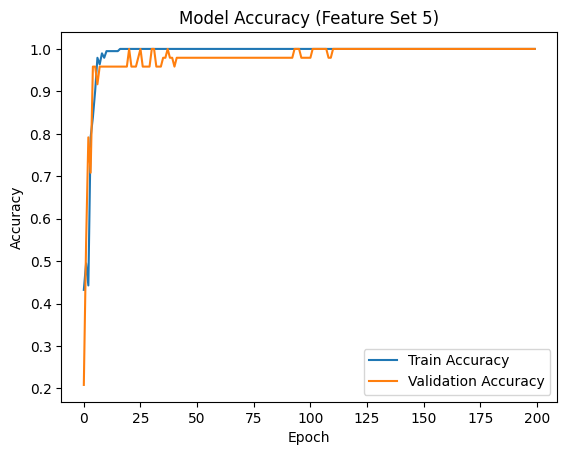

In [191]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Feature Set 5)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Precision: 0.9841
Recall: 0.9833
F1 Score: 0.9833
78.41890931129456


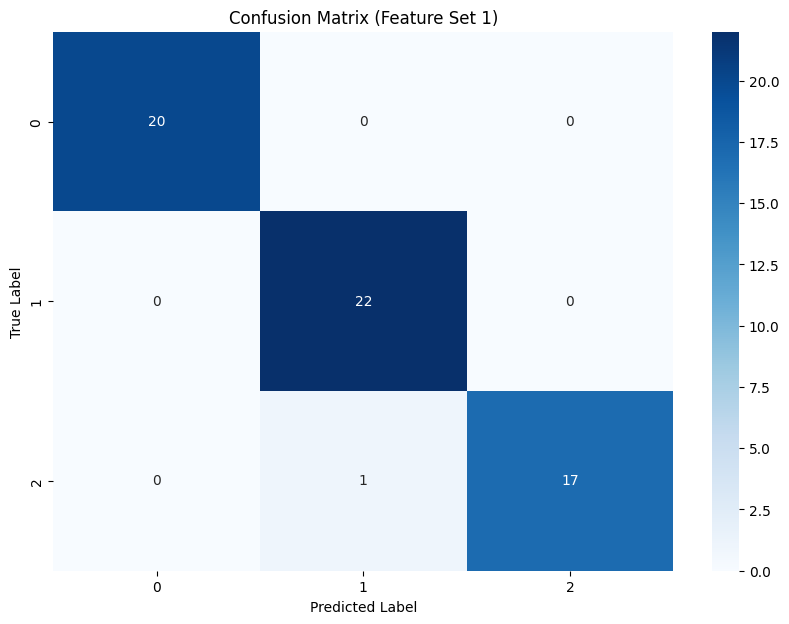

In [192]:
# Make predictions
y_pred_prob128 = model.predict(X_test128)  # Get predicted probabilities
y_pred128 = np.argmax(y_pred_prob128, axis=1)  # Convert probabilities to class labels
y_true128 = np.argmax(y_test128, axis=1)  # Convert one-hot encoded true labels to class labels

# Calculate precision, recall, and F1 score
precision = precision_score(y_true128, y_pred128, average='weighted')
recall = recall_score(y_true128, y_pred128, average='weighted')
f1 = f1_score(y_true128, y_pred128, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(total_training_time2)

# Plot confusion matrix
cm = confusion_matrix(y_true128, y_pred128)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(3), yticklabels=np.arange(3))
plt.title('Confusion Matrix (Feature Set 1)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Feature Set 6

In [193]:
# Convert labels to one-hot encoding
y_train164 = to_categorical(y_train164, num_classes=3)
y_test164 = to_categorical(y_test164, num_classes=3)

In [194]:
# Build the model
model = Sequential([
    layers.Dense(4096, activation='relu', input_shape=(64 * 64,)),  # First hidden layer
    layers.Dense(128, activation='relu'),                          # First hidden layer
    layers.Dense(64, activation='relu'),                          # Second hidden layer
    layers.Dense(3, activation='softmax')                         # Output layer
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
start_time2 = time.time()  # Record the start time
history = model.fit(X_train164, y_train164, epochs=200, batch_size=128,
                    validation_split=0.2)
end_time2 = time.time()  # Record the end time
total_training_time2 = end_time2 - start_time2  # Calculate total training time

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test164, y_test164)
print(f'Test accuracy: {test_accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 644ms/step - accuracy: 0.2899 - loss: 2.9786 - val_accuracy: 0.3333 - val_loss: 14.7487
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 436ms/step - accuracy: 0.3594 - loss: 18.7414 - val_accuracy: 0.4583 - val_loss: 7.4840
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step - accuracy: 0.2951 - loss: 9.4167 - val_accuracy: 0.2292 - val_loss: 3.9735
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 674ms/step - accuracy: 0.4358 - loss: 2.7429 - val_accuracy: 0.3333 - val_loss: 1.8368
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 698ms/step - accuracy: 0.4444 - loss: 1.5071 - val_accuracy: 0.6875 - val_loss: 0.7266
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 437ms/step - accuracy: 0.7352 - loss: 0.7546 - val_accuracy: 0.8125 - val_loss: 0.3759
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 458ms/step - accuracy: 0.9297 - loss: 0.2500 - val_accuracy: 0.9375 - val_loss: 0.3429
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 463ms/step - accuracy: 0.8819 - loss: 0.4134 - val_accuracy: 0.8958 -

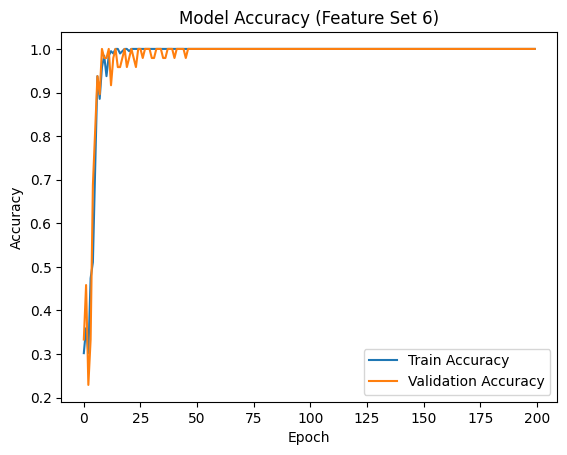

In [196]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Feature Set 6)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Precision: 0.9694
Recall: 0.9667
F1 Score: 0.9669
273.5280957221985


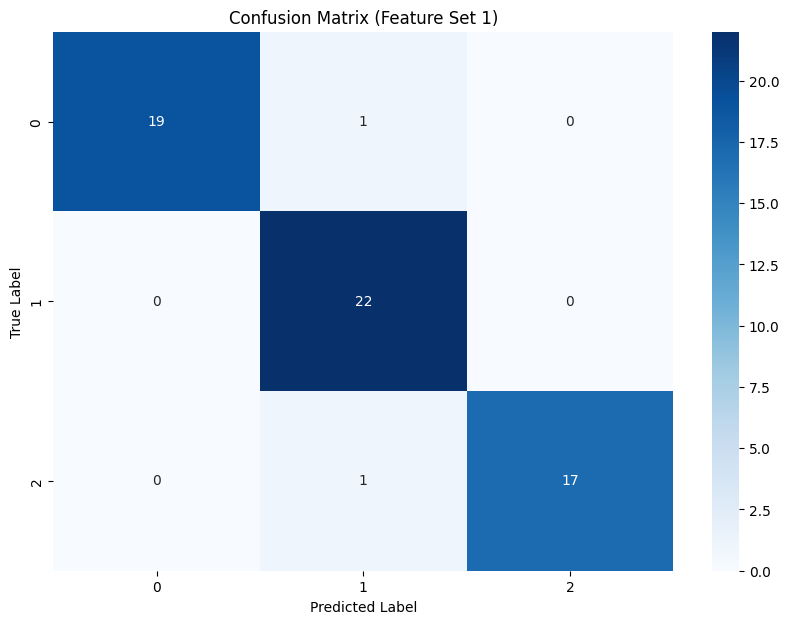

In [197]:
# Make predictions
y_pred_prob164 = model.predict(X_test164)  # Get predicted probabilities
y_pred164 = np.argmax(y_pred_prob164, axis=1)  # Convert probabilities to class labels
y_true164 = np.argmax(y_test164, axis=1)  # Convert one-hot encoded true labels to class labels

# Calculate precision, recall, and F1 score
precision = precision_score(y_true164, y_pred164, average='weighted')
recall = recall_score(y_true164, y_pred164, average='weighted')
f1 = f1_score(y_true164, y_pred164, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(total_training_time2)

# Plot confusion matrix
cm = confusion_matrix(y_true164, y_pred164)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(3), yticklabels=np.arange(3))
plt.title('Confusion Matrix (Feature Set 1)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()